<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Reto_1_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RETO 1: Caracterización y Muestreo de Variables Aleatorias**

##0. Cargamos Librerias

In [ ]:
import numpy as np #Funciones Númericas
import matplotlib.pyplot as plt
import pandas as pd #Comunicación con el Excel
import seaborn as sns #Libreria para la gráfica de distribuciones

#Para carga automática de los datos
from google.colab import drive #Cargar datos desde Drive automáticamente
drive.mount('/content/drive')

Mounted at /content/drive


##1. Cargamos la Base de Datos

In [ ]:
nxl = '/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/1. AdmonEjecProcesos.xlsx'
XDB = pd.read_excel(nxl, sheet_name=0,header=1)

#Mostramos los primeros 100 datos
XDB.head(100)

,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas,Valor Generado (millones)
0,2010-01-01,44,358.3637,5,0.079029
1,2010-01-02,43,742.8517,7,0.021259
2,2010-01-03,55,646.6903,9,0.038818
3,2010-01-04,59,653.5397,3,0.035956
4,2010-01-05,52,636.6142,4,0.204951
...,...,...,...,...,...
95,2010-04-06,50,441.8036,10,0.206232
96,2010-04-07,48,552.9503,7,0.019812
97,2010-04-08,58,453.7787,6,0.054705
98,2010-04-09,49,596.0837,6,0.006537


In [ ]:
#Revisamos la cantidad de datos
XDB.shape

(350, 5)

In [ ]:
#Tomamos las variables de interés
Xev = XDB.iloc[:,3] #Transacciones Fallidas
Xsev = XDB.iloc[:,4] #Valor Generado (millones)

LDA= np.multiply(Xev,Xsev) #Multiplicamos las variables

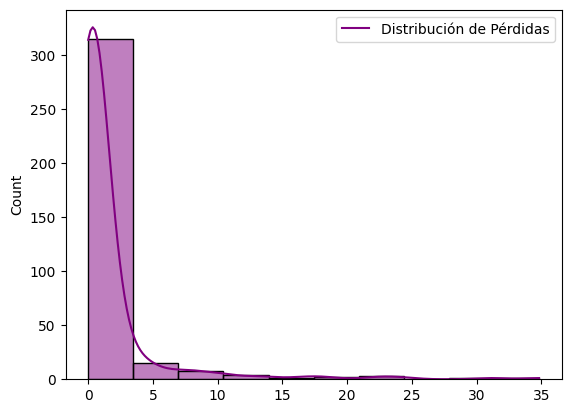

In [ ]:
#Gráficamos la distribución de las Pérdidas
plt.figure()
sns.histplot(LDA, kde=True, bins=10, color= 'purple')
plt.legend(['Distribución de Pérdidas'])
plt.show()

##2. Caracterización de la Distribución de las Pérdidas

In [ ]:
counts,bins_edges=np.histogram(LDA,bins=10)
print("Los datos por intervalo son:\n", counts)     #Cuantos datos hay por intervalo
print("Los limites de los intervalos son: \n", bins_edges) #Limites de los Intervalos

Los datos por intervalo son:
 [315  15   8   4   1   2   3   0   1   1]
Los limites de los intervalos son: 
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057 34.82215619]


In [ ]:
#1. Los valores centrales - marca de clase
mc= (bins_edges[:-1]+bins_edges[1:])/2
#Limites Inferiores bins_edges[:-1]
#Limites Superiores bins_edges[1:]
print("Los valores centrales de las clases son: \n", mc)

Los valores centrales de las clases son: 
 [ 1.74110781  5.22332343  8.70553905 12.18775467 15.66997029 19.15218591
 22.63440152 26.11661714 29.59883276 33.08104838]


In [ ]:
#Cuantos datos hay por Intervalo
fp = counts/sum(counts)
print("Los datos por intervalos son:\n", fp)

Los datos por intervalos son:
 [0.9        0.04285714 0.02285714 0.01142857 0.00285714 0.00571429
 0.00857143 0.         0.00285714 0.00285714]


In [ ]:
#2. Se procede con el cálculo de las medidas de Tendencia Central (Media, Varianza, Coeficiente de Asimetría, Kortosis)

#2.1.Media
u = np.sum(np.multiply(mc, fp))
print("La media de los datos es: ", u)

#2.2. Desviación Estándar - Varianza
#Varianza
var = np.sum(np.multiply((mc-u)**2,fp)) #Suma producto del Excel
print("La varianza de los datos es: ", var)
#Desviación Estándar
std = np.sqrt(var)
print("La desviación estándar de los datos es: ", std)

#2.3.Coeficiente de Asimetría
cas= np.sum(np.multiply((mc-u)**3,fp))/((std**3)*np.sum(fp))
print("El coeficiente de asimetría de los datos es: ", cas)

#2.4. Kurtosis
kur= np.sum(np.multiply((mc-u)**4,fp))/((std**4)*np.sum(fp))
kur= kur-3
print("La kurtosis de los datos es: ", kur)

La media de los datos es:  2.656433058055811
La varianza de los datos es:  13.089556542674002
La desviación estándar de los datos es:  3.6179492178130417
El coeficiente de asimetría de los datos es:  5.313307467317224
La kurtosis de los datos es:  31.73555682667


In [ ]:
#Error asociado con la muestra de los datos
z= 2**2
p= 0.9550
nd= len(LDA)
ek2= (z*p*(1-p))/nd
ek= np.sqrt(ek2)
print(f"Error asociado con la muestra de los datos: {ek}")

Error asociado con la muestra de los datos: 0.022161743098024975


##3. Muestreo Aleatorio utilizando el método Montecarlo

In [ ]:
#Número de simulaciones
num_simulaciones = 10000

#Nivel de confianza (99.9%)
nivel_confianza = 0.999

#Calcular el percentil correspondiente al nivel de confianza
percentil = np.percentile(LDA, 100 * (1 - nivel_confianza))

#Realizar el muestreo aleatorio
muestras_montecarlo = np.random.choice(LDA, size=1000, replace=True)

#Calcular la pérdida agregada para cada simulación
#perdidas_agregadas = np.sum(muestras_montecarlo, axis=1)

In [ ]:
#Imprimimos los datos a una hoja de excel
df = pd.DataFrame(muestras_montecarlo)
df.to_excel('muestras_montecarlo.xlsx', index=False)

Ahora, calculamos las métricas después de realizar el muestreo

In [ ]:
counts_1,bins_edges_1=np.histogram(muestras_montecarlo,bins=10)
print("Los datos por intervalo son:\n", counts_1)     #Cuantos datos hay por intervalo
print("Los limites de los intervalos son: \n", bins_edges_1) #Limites de los Intervalos

Los datos por intervalo son:
 [885  50  25  10   5   3  10   0   5   7]
Los limites de los intervalos son: 
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057 34.82215619]


In [ ]:
#1. Los valores centrales - marca de clase
mc_1= (bins_edges_1[:-1]+bins_edges_1[1:])/2
#Limites Inferiores bins_edges[:-1]
#Limites Superiores bins_edges[1:]
print("Los valores centrales de las clases son: \n", mc_1)

Los valores centrales de las clases son: 
 [ 1.74110781  5.22332343  8.70553905 12.18775467 15.66997029 19.15218591
 22.63440152 26.11661714 29.59883276 33.08104838]


In [ ]:
#Cuantos datos hay por Intervalo
fp_1 = counts_1/sum(counts_1)
print("Los datos por intervalos son:\n", fp_1)

Los datos por intervalos son:
 [0.885 0.05  0.025 0.01  0.005 0.003 0.01  0.    0.005 0.007]


In [ ]:
#2. Métricas Después del Muestreo
#Media
u_m = np.sum(np.multiply(mc_1, fp_1))
print("La media de los datos después del muestreo es:: ", u_m)

#2.2. Desviación Estándar - Varianza
#Varianza
var_m = np.sum(np.multiply((mc_1-u_m)**2,fp_1)) #Suma producto del Excel
print("La varianza de los datos después del muestreo es: ", var_m)
#Desviación Estándar
std_m = np.sqrt(var_m)
print("La desviación estándar de los datos después del muestreo es: ", std_m)

#2.3.Coeficiente de Asimetría
cas_m= np.sum(np.multiply((mc_1-u_m)**3,fp_1))/((std_m**3)*np.sum(fp_1))
print("El coeficiente de asimetría de los datos después del muestreo es: ", cas_m)

#2.4. Kurtosis
kur_m= np.sum(np.multiply((mc_1-u_m)**4,fp_1))/((std_m**4)*np.sum(fp_1))
kur_m= kur_m-3
print("La kurtosis de los datos después del muestreo es: ", kur_m)

La media de los datos después del muestreo es::  2.8832745326763076
La varianza de los datos después del muestreo es:  18.60606084211561
La desviación estándar de los datos después del muestreo es:  4.313474335395496
El coeficiente de asimetría de los datos después del muestreo es:  4.994382593992126
La kurtosis de los datos después del muestreo es:  26.869337846832913


In [ ]:
#Error asociado con la muestra de los datos
z_m= 2**2
p_m= 0.9550
nd_m= len(muestras_montecarlo)
ek2_m= (z_m*p_m*(1-p_m))/nd_m
ek_m= np.sqrt(ek2)
print(f"Error asociado con la muestra de los datos: {ek_m}")

Error asociado con la muestra de los datos: 0.0131110640300473


##4. Validación


In [ ]:
#Realizamos una tabla con las métricas antes y después del muestreo
data = {
    'Métrica': ['Media', 'Varianza', 'Asimetría', 'Kurtosis', 'Error'],
    'Antes del Muestreo': [u, var, cas, kur, ek],
    'Después del Muestreo': [u_m, var_m, cas_m, kur_m, ek_m]
}
df = pd.DataFrame(data)
print(df)

     Métrica  Antes del Muestreo  Después del Muestreo
0      Media            2.656433              2.883275
1   Varianza           13.089557             18.606061
2  Asimetría            5.313307              4.994383
3   Kurtosis           31.735557             26.869338
4      Error            0.022162              0.013111


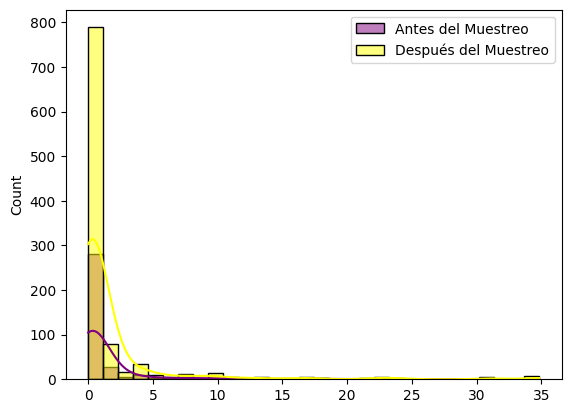

In [ ]:
#Gráfica de Distribuciones
plt.figure()
sns.histplot(LDA, kde=True, bins=30, color= 'purple', alpha=0.5, label='Antes del Muestreo')
sns.histplot(muestras_montecarlo, kde=True, bins=30, color= 'yellow', alpha=0.5, label='Después del Muestreo')
plt.legend()
plt.show()

##5. Análisis de Resultados

Después de caracterizar los datos de los eventos de pérdida, tanto antes como después de aplicar el método de muestreo Montecarlo, y tras obtener los valores de las métricas (media, varianza, asimetría, curtosis y el error asociado a la media), se aprecia que el muestreo impacta la distribución de los datos.

En concreto, la media aumenta ligeramente (de 2.65 a 2.88), aunque esta diferencia no es considerable en comparación con la media de los datos originales. La varianza, por su parte, experimenta un incremento significativo (de 13.08 a 18.60), lo que indica que, tras aplicar el método Montecarlo, los datos se dispersan más (se alejan de la media).

En contraste, el error disminuye (de 0.022 a 0.013), lo que sugiere que la estimación de la media es más precisa después del muestreo. Cabe destacar que, en ambos casos, la mayoría de los eventos de pérdida se concentran en el primer intervalo (90% y 88.5% respectivamente), lo que evidencia que los porcentajes de eventos de pérdida son muy bajos, especialmente en los intervalos que agrupan las pérdidas más altas.

En cuanto al gráfico, se observa una asimetría positiva en ambas distribuciones. No obstante, tras el muestreo, la distribución de los datos se desplaza hacia valores más altos, lo que incrementa la variabilidad de los datos.